# Case study for the multi-variate alpha-stable distribution 

We will now use veriues network arichtetures to learn the summary statisitics for the multi-variate $\alpha$-stable distribution. The network archtitures that we will consider are: MLP, MLP with data pre-processing, and DeepSets.

#### The multivariate alpha stabel distribution 

### Setup

In [1]:
# set path
cd("..") # set correct working directory 
pwd() # this path should go to the folder with the .git file 

# load packages
using Pkg
using PyPlot
using DataFrames
using CSV
using Distributions
using KernelDensity 

# include files
include(pwd()*"/src/multivar alpha stable dist/set_up.jl")

# load data
y_test = Matrix(CSV.read("data/multivar alpha stable/y_test.csv"; allowmissing=:auto));


┌ Info: Recompiling stale cache file /home/samuel/.julia/compiled/v1.0/Distributions/xILW0.ji for Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /home/samuel/.julia/compiled/v1.0/KernelDensity/4QyGx.ji for KernelDensity [5ab0869b-81aa-558d-bb23-cbf5423bbe9b]
└ @ Base loading.jl:1184


Loading alpha-stable model


Plot data.

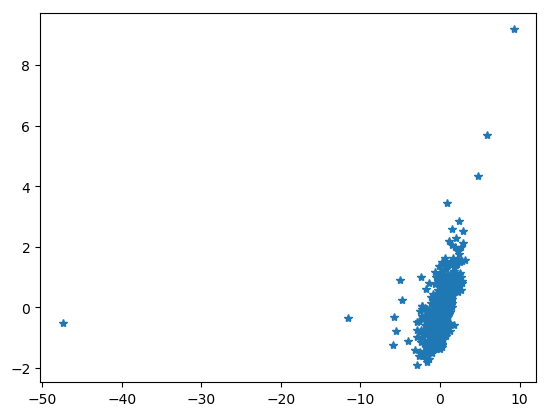

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa5b7fdcb00>

In [2]:
PyPlot.figure()
PyPlot.plot(y_obs[1,:],y_obs[2,:], "*")


Calc prior dist. 

In [3]:
# calc grid for prior dist
x_grid1 = 1:0.01:2.1
x_grid2 = -3:0.01:3
x_grid3 = -0.1:0.01:2*pi+0.1
x_grid4 = -0.1:0.01:1+0.1

# calc prior dist
priordensity1 = pdf.(Uniform(1.1,2), x_grid1)
priordensity2 = pdf.(Normal(0,1), x_grid2)
priordensity3 = pdf.(Uniform(0,2*pi), x_grid3)
priordensity4 = pdf.(Beta(2,2), x_grid4);

## Network performance

### Results using standard ABC

Load results 

In [4]:
posterior_summary_stats = Matrix(CSV.read("data/multivar alpha stable/abcrs_post.csv"; allowmissing=:auto));

#### Posterior inference  

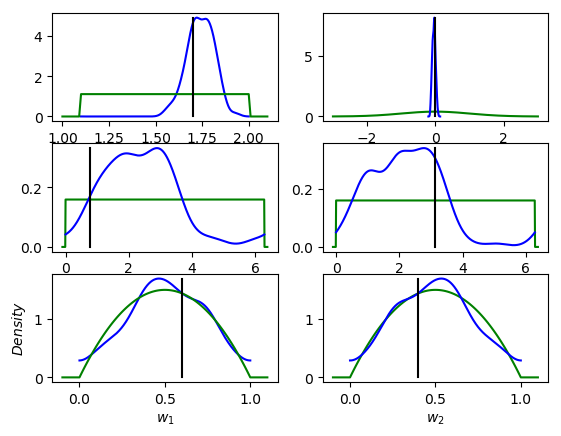

PyObject Text(0.5,24.4,'$w_2$')

In [5]:
h1 = kde(posterior_summary_stats[:,1]; boundary=(1.1,2))
h2 = kde(posterior_summary_stats[:,2])
h3 = kde(posterior_summary_stats[:,3]; boundary=(0,2pi))
h4 = kde(posterior_summary_stats[:,4]; boundary=(0,2pi))
h5 = kde(posterior_summary_stats[:,5]; boundary=(0,1))
h6 = kde(posterior_summary_stats[:,6]; boundary=(0,1))

PyPlot.figure()
PyPlot.subplot(321)
PyPlot.plot(h1.x,h1.density, "b")
PyPlot.plot(x_grid1,priordensity1, "g")
PyPlot.plot((θ_true[1], θ_true[1]), (0, maximum(h1.density)), "k")
PyPlot.xlabel(L"$α$")
PyPlot.subplot(322)
PyPlot.plot(x_grid2,priordensity2, "g")
PyPlot.plot(h2.x,h2.density, "b")
PyPlot.plot((θ_true[2], θ_true[2]), (0, maximum(h2.density)), "k")
PyPlot.xlabel(L"$μ_0$")
PyPlot.subplot(323)
PyPlot.plot(x_grid3,priordensity3, "g")
PyPlot.plot(h3.x,h3.density, "b")
PyPlot.plot((θ_true[3], θ_true[3]), (0, maximum(h3.density)), "k")
PyPlot.xlabel(L"$ϕ_1$")
PyPlot.subplot(324)
PyPlot.plot(x_grid3,priordensity3, "g")
PyPlot.plot(h4.x,h4.density, "b")
PyPlot.plot((θ_true[4], θ_true[4]), (0, maximum(h4.density)), "k")
PyPlot.xlabel(L"$ϕ_2$")
PyPlot.subplot(325)
PyPlot.plot(h5.x,h5.density, "b")
PyPlot.plot(x_grid4,priordensity4, "g")
PyPlot.plot((θ_true[5], θ_true[5]), (0, maximum(h5.density)), "k")
PyPlot.xlabel(L"$w_1$")
PyPlot.ylabel(L"Density")
PyPlot.subplot(326)
PyPlot.plot(x_grid4,priordensity4, "g")
PyPlot.plot(h6.x,h6.density, "b")
PyPlot.plot((θ_true[6], θ_true[6]), (0, maximum(h6.density)), "k")
PyPlot.xlabel(L"$w_2$")

### Results using MLP

#### Network info

Structure: 1000 (input) -> 1000 -> 1000 -> 500 -> 4 (output)

Number weights: 2504504

Training time: 6258.06 sec. (1.74 h)

ABC runtime: 194.37 sec. (3.24 min.)

Load results. 

In [5]:
loss_training_dnn_simple = Matrix(CSV.read("data/multivar alpha stable/loss_vec_training_simple_DNN_small_1.csv"; allowmissing=:auto))
loss_val_dnn_simple = Matrix(CSV.read("data/multivar alpha stable/loss_vec_val_simple_DNN_small_1.csv"; allowmissing=:auto))
predictions_dnn_simple = Matrix(CSV.read("data/multivar alpha stable/predictions_simple_DNN_small_1.csv"; allowmissing=:auto))
posterior_dnn_simple = Matrix(CSV.read("data/multivar alpha stable/abcrs_post_simple_DNN_small_1.csv"; allowmissing=:auto));

#### Network performance  

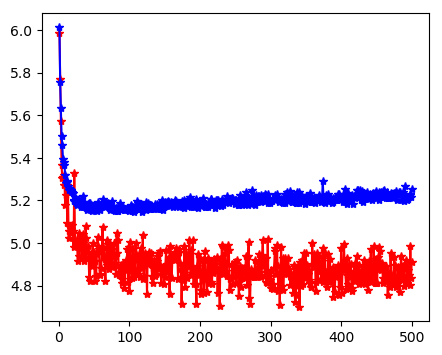

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f19c0d34080>

In [17]:
# plot training and val error
PyPlot.figure(figsize=(5,4))
PyPlot.plot(1:length(loss_training_dnn_simple), loss_training_dnn_simple[:], "*-r")
PyPlot.plot(1:length(loss_training_dnn_simple), loss_val_dnn_simple[:], "*-b")


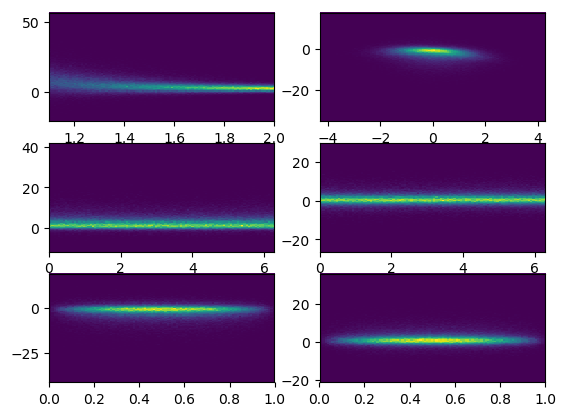

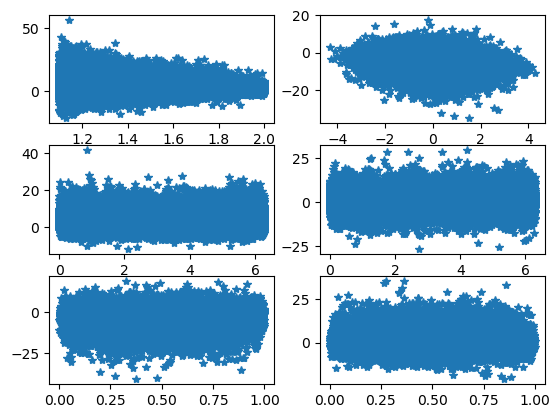

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f19bfcd7a58>

In [18]:
# plot predictions
PyPlot.figure()
PyPlot.subplot(321)
PyPlot.plt[:hist2d](y_test[:,1], predictions_dnn_simple[:,1], bins=(100, 100))
PyPlot.subplot(322)
PyPlot.plt[:hist2d](y_test[:,2], predictions_dnn_simple[:,2], bins=(100, 100))
PyPlot.subplot(323)
PyPlot.plt[:hist2d](y_test[:,3], predictions_dnn_simple[:,3], bins=(100, 100))
PyPlot.subplot(324)
PyPlot.plt[:hist2d](y_test[:,4], predictions_dnn_simple[:,4], bins=(100, 100))
PyPlot.subplot(325)
PyPlot.plt[:hist2d](y_test[:,5], predictions_dnn_simple[:,5], bins=(100, 100))
PyPlot.subplot(326)
PyPlot.plt[:hist2d](y_test[:,6], predictions_dnn_simple[:,6], bins=(100, 100))

# plot predictions
PyPlot.figure()
PyPlot.subplot(321)
PyPlot.plot(y_test[:,1], predictions_dnn_simple[:,1], "*")
PyPlot.subplot(322)
PyPlot.plot(y_test[:,2], predictions_dnn_simple[:,2], "*")
PyPlot.subplot(323)
PyPlot.plot(y_test[:,3], predictions_dnn_simple[:,3], "*")
PyPlot.subplot(324)
PyPlot.plot(y_test[:,4], predictions_dnn_simple[:,4], "*")
PyPlot.subplot(325)
PyPlot.plot(y_test[:,5], predictions_dnn_simple[:,5], "*")
PyPlot.subplot(326)
PyPlot.plot(y_test[:,6], predictions_dnn_simple[:,6], "*")


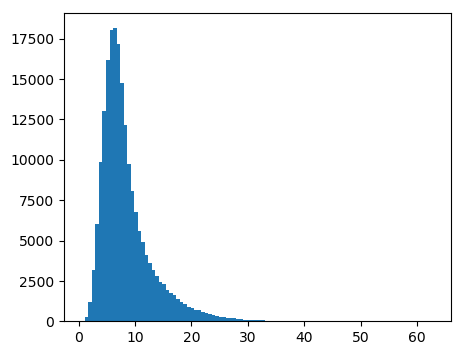

In [19]:
# check pred error
loss_test = sqrt.(sum((predictions_dnn_simple - y_test).^2, dims=2))

PyPlot.figure(figsize=(5,4))
h = PyPlot.plt[:hist](loss_test,100);


#### Posterior inference  

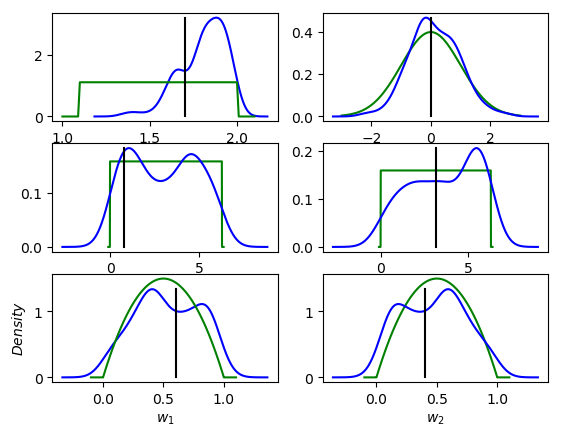

PyObject Text(0.5,24.4,'$w_2$')

In [20]:
# simple DNN large
h1 = kde(posterior_dnn_simple[:,1]; boundary=(1.1,2))
h2 = kde(posterior_dnn_simple[:,2])
h3 = kde(posterior_dnn_simple[:,3]; boundary=(0,2pi))
h4 = kde(posterior_dnn_simple[:,4]; boundary=(0,2pi))
h5 = kde(posterior_dnn_simple[:,5]; boundary=(0,1))
h6 = kde(posterior_dnn_simple[:,6]; boundary=(0,1))

PyPlot.figure()
PyPlot.subplot(321)
PyPlot.plot(h1.x,h1.density, "b")
PyPlot.plot(x_grid1,priordensity1, "g")
PyPlot.plot((θ_true[1], θ_true[1]), (0, maximum(h1.density)), "k")
PyPlot.xlabel(L"$α$")
PyPlot.subplot(322)
PyPlot.plot(x_grid2,priordensity2, "g")
PyPlot.plot(h2.x,h2.density, "b")
PyPlot.plot((θ_true[2], θ_true[2]), (0, maximum(h2.density)), "k")
PyPlot.xlabel(L"$μ_0$")
PyPlot.subplot(323)
PyPlot.plot(x_grid3,priordensity3, "g")
PyPlot.plot(h3.x,h3.density, "b")
PyPlot.plot((θ_true[3], θ_true[3]), (0, maximum(h3.density)), "k")
PyPlot.xlabel(L"$ϕ_1$")
PyPlot.subplot(324)
PyPlot.plot(x_grid3,priordensity3, "g")
PyPlot.plot(h4.x,h4.density, "b")
PyPlot.plot((θ_true[4], θ_true[4]), (0, maximum(h4.density)), "k")
PyPlot.xlabel(L"$ϕ_2$")
PyPlot.subplot(325)
PyPlot.plot(h5.x,h5.density, "b")
PyPlot.plot(x_grid4,priordensity4, "g")
PyPlot.plot((θ_true[5], θ_true[5]), (0, maximum(h5.density)), "k")
PyPlot.xlabel(L"$w_1$")
PyPlot.ylabel(L"Density")
PyPlot.subplot(326)
PyPlot.plot(x_grid4,priordensity4, "g")
PyPlot.plot(h6.x,h6.density, "b")
PyPlot.plot((θ_true[6], θ_true[6]), (0, maximum(h6.density)), "k")
PyPlot.xlabel(L"$w_2$")


### Results using MLP w. data preprocessing (timeseries)

#### Network info

Structure: 100 (input) -> 1000 -> 1000 -> 500 -> 4 (output)

Number weights: 25454 

Training time: 2097.84 sec. (34.95 min)

ABC runtime: 15.23 sec. (0.25 min)

Load results. 

In [21]:
loss_training_dnn_timseries_data = Matrix(CSV.read("data/multivar alpha stable/loss_vec_training_dnn_timseries_data_1.csv"; allowmissing=:auto))
loss_val_dnn_timseries_data = Matrix(CSV.read("data/multivar alpha stable/loss_vec_val_dnn_timseries_data_1.csv"; allowmissing=:auto))
predictions_dnn_timseries_data = Matrix(CSV.read("data/multivar alpha stable/predictions_dnn_timseries_data_1.csv"; allowmissing=:auto))
posterior_timeseries_data = Matrix(CSV.read("data/multivar alpha stable/abcrs_post_dnn_timseries_data_1.csv"; allowmissing=:auto));

#### Network performance  

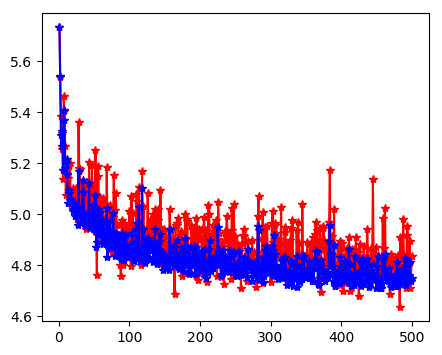

In [22]:
# plot training and val error
PyPlot.figure(figsize=(5,4))
PyPlot.plot(1:length(loss_training_dnn_timseries_data), loss_training_dnn_timseries_data[:], "*-r")
PyPlot.plot(1:length(loss_training_dnn_timseries_data), loss_val_dnn_timseries_data[:], "*-b");

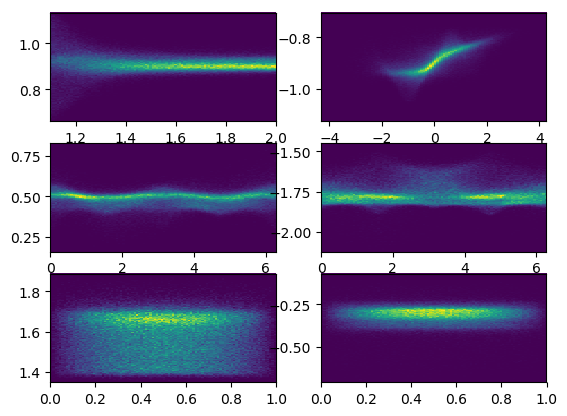

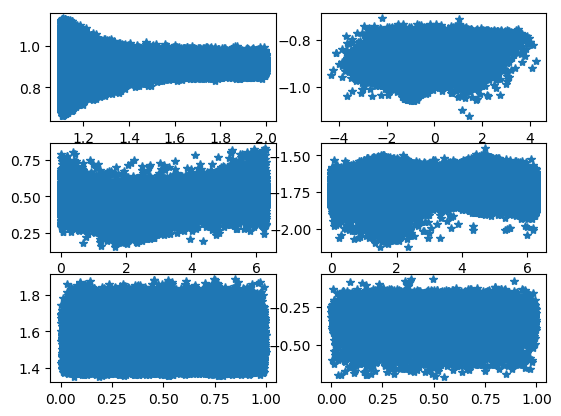

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f19bfe18588>

In [24]:
# plot predictions
# plot predictions
PyPlot.figure()
PyPlot.subplot(321)
PyPlot.plt[:hist2d](y_test[:,1], predictions_dnn_timseries_data[:,1], bins=(100, 100))
PyPlot.subplot(322)
PyPlot.plt[:hist2d](y_test[:,2], predictions_dnn_timseries_data[:,2], bins=(100, 100))
PyPlot.subplot(323)
PyPlot.plt[:hist2d](y_test[:,3], predictions_dnn_timseries_data[:,3], bins=(100, 100))
PyPlot.subplot(324)
PyPlot.plt[:hist2d](y_test[:,4], predictions_dnn_timseries_data[:,4], bins=(100, 100))
PyPlot.subplot(325)
PyPlot.plt[:hist2d](y_test[:,5], predictions_dnn_timseries_data[:,5], bins=(100, 100))
PyPlot.subplot(326)
PyPlot.plt[:hist2d](y_test[:,6], predictions_dnn_timseries_data[:,6], bins=(100, 100))

# plot predictions
PyPlot.figure()
PyPlot.subplot(321)
PyPlot.plot(y_test[:,1], predictions_dnn_timseries_data[:,1], "*")
PyPlot.subplot(322)
PyPlot.plot(y_test[:,2], predictions_dnn_timseries_data[:,2], "*")
PyPlot.subplot(323)
PyPlot.plot(y_test[:,3], predictions_dnn_timseries_data[:,3], "*")
PyPlot.subplot(324)
PyPlot.plot(y_test[:,4], predictions_dnn_timseries_data[:,4], "*")
PyPlot.subplot(325)
PyPlot.plot(y_test[:,5], predictions_dnn_timseries_data[:,5], "*")
PyPlot.subplot(326)
PyPlot.plot(y_test[:,6], predictions_dnn_timseries_data[:,6], "*")

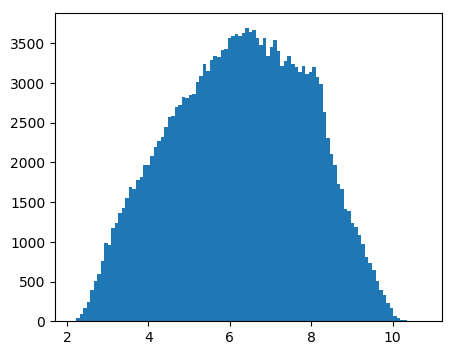

In [25]:
# check pred error
loss_test = sqrt.(sum((predictions_dnn_timseries_data - y_test).^2, dims=2))

PyPlot.figure(figsize=(5,4))
h = PyPlot.plt[:hist](loss_test,100);

#### Posterior inference  

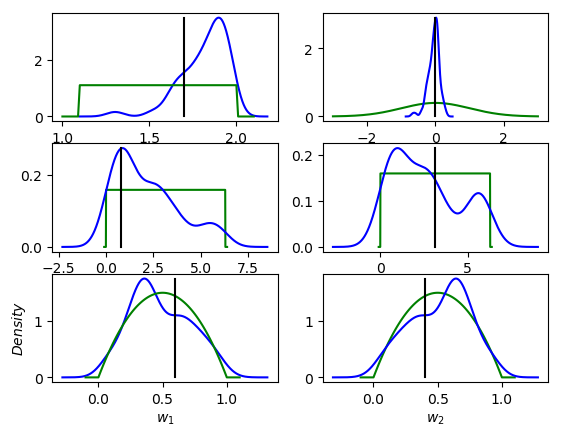

PyObject Text(0.5,24.4,'$w_2$')

In [26]:
# simple DNN timeseries data
h1 = kde(posterior_timeseries_data[:,1]; boundary=(1.1,2))
h2 = kde(posterior_timeseries_data[:,2])
h3 = kde(posterior_timeseries_data[:,3]; boundary=(0,2pi))
h4 = kde(posterior_timeseries_data[:,4]; boundary=(0,2pi))
h5 = kde(posterior_timeseries_data[:,5]; boundary=(0,1))
h6 = kde(posterior_timeseries_data[:,6]; boundary=(0,1))

PyPlot.figure()
PyPlot.subplot(321)
PyPlot.plot(h1.x,h1.density, "b")
PyPlot.plot(x_grid1,priordensity1, "g")
PyPlot.plot((θ_true[1], θ_true[1]), (0, maximum(h1.density)), "k")
PyPlot.xlabel(L"$α$")
PyPlot.subplot(322)
PyPlot.plot(x_grid2,priordensity2, "g")
PyPlot.plot(h2.x,h2.density, "b")
PyPlot.plot((θ_true[2], θ_true[2]), (0, maximum(h2.density)), "k")
PyPlot.xlabel(L"$μ_0$")
PyPlot.subplot(323)
PyPlot.plot(x_grid3,priordensity3, "g")
PyPlot.plot(h3.x,h3.density, "b")
PyPlot.plot((θ_true[3], θ_true[3]), (0, maximum(h3.density)), "k")
PyPlot.xlabel(L"$ϕ_1$")
PyPlot.subplot(324)
PyPlot.plot(x_grid3,priordensity3, "g")
PyPlot.plot(h4.x,h4.density, "b")
PyPlot.plot((θ_true[4], θ_true[4]), (0, maximum(h4.density)), "k")
PyPlot.xlabel(L"$ϕ_2$")
PyPlot.subplot(325)
PyPlot.plot(h5.x,h5.density, "b")
PyPlot.plot(x_grid4,priordensity4, "g")
PyPlot.plot((θ_true[5], θ_true[5]), (0, maximum(h5.density)), "k")
PyPlot.xlabel(L"$w_1$")
PyPlot.ylabel(L"Density")
PyPlot.subplot(326)
PyPlot.plot(x_grid4,priordensity4, "g")
PyPlot.plot(h6.x,h6.density, "b")
PyPlot.plot((θ_true[6], θ_true[6]), (0, maximum(h6.density)), "k")
PyPlot.xlabel(L"$w_2$")

### Results using DeepSets 

#### Network info

Structure: 1000 (input) -> 100 -> 50 -> 10 (output inner), summation, then 10 (input outer) -> 100 -> 100 -> 50 -> 2 (output)

Number weights: 22214

Training time: 52312.34 sec. (14.53 h)

ABC runtime: 254.71 sec. (4.25 min)

Load results. 

In [6]:
loss_training_deepsets = Matrix(CSV.read("data/multivar alpha stable/loss_vec_training_deepsets_1.csv"; allowmissing=:auto))
loss_val_deepsets = Matrix(CSV.read("data/multivar alpha stable/loss_vec_val_deepsets_1.csv"; allowmissing=:auto))
predictions_deepsets = Matrix(CSV.read("data/multivar alpha stable/predictions_deepsets_1.csv"; allowmissing=:auto))
posterior_deepsets = Matrix(CSV.read("data/multivar alpha stable/abcrs_post_deepsets_1.csv"; allowmissing=:auto));

#### Network performance  

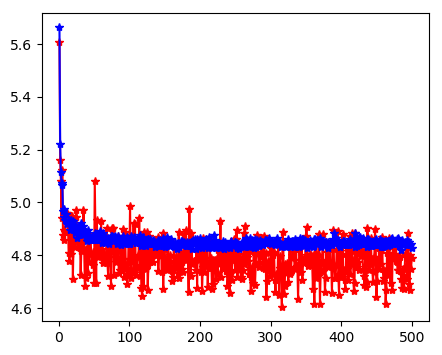

In [7]:
# plot training and val error
PyPlot.figure(figsize=(5,4))
PyPlot.plot(1:length(loss_training_deepsets), loss_training_deepsets[:], "*-r")
PyPlot.plot(1:length(loss_training_deepsets), loss_val_deepsets[:], "*-b");

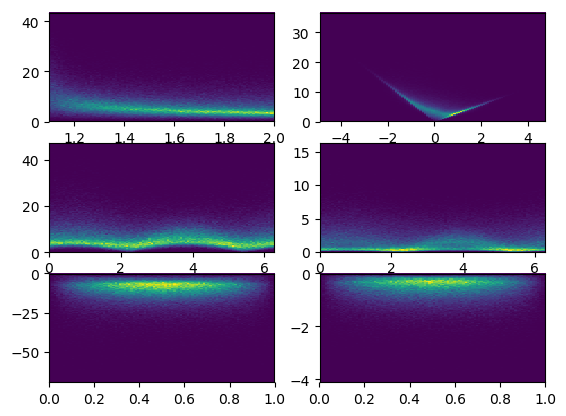

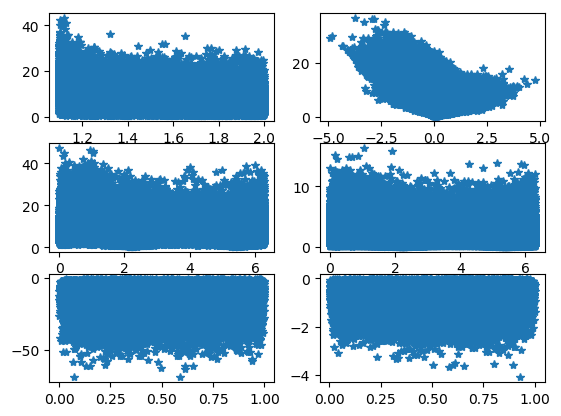

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa5b57f5f28>

In [8]:
# plot predictions
# plot predictions
PyPlot.figure()
PyPlot.subplot(321)
PyPlot.plt[:hist2d](y_test[:,1], predictions_deepsets[:,1], bins=(100, 100))
PyPlot.subplot(322)
PyPlot.plt[:hist2d](y_test[:,2], predictions_deepsets[:,2], bins=(100, 100))
PyPlot.subplot(323)
PyPlot.plt[:hist2d](y_test[:,3], predictions_deepsets[:,3], bins=(100, 100))
PyPlot.subplot(324)
PyPlot.plt[:hist2d](y_test[:,4], predictions_deepsets[:,4], bins=(100, 100))
PyPlot.subplot(325)
PyPlot.plt[:hist2d](y_test[:,5], predictions_deepsets[:,5], bins=(100, 100))
PyPlot.subplot(326)
PyPlot.plt[:hist2d](y_test[:,6], predictions_deepsets[:,6], bins=(100, 100))

PyPlot.figure()
PyPlot.subplot(321)
PyPlot.plot(y_test[:,1], predictions_deepsets[:,1], "*")
PyPlot.subplot(322)
PyPlot.plot(y_test[:,2], predictions_deepsets[:,2], "*")
PyPlot.subplot(323)
PyPlot.plot(y_test[:,3], predictions_deepsets[:,3], "*")
PyPlot.subplot(324)
PyPlot.plot(y_test[:,4], predictions_deepsets[:,4], "*")
PyPlot.subplot(325)
PyPlot.plot(y_test[:,5], predictions_deepsets[:,5], "*")
PyPlot.subplot(326)
PyPlot.plot(y_test[:,6], predictions_deepsets[:,6], "*")

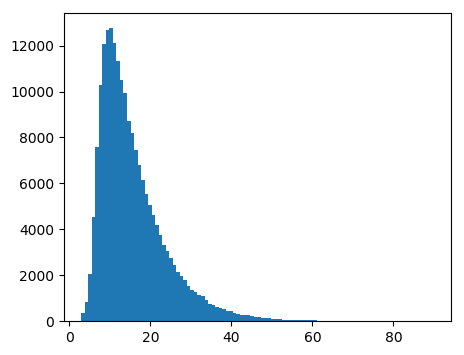

In [9]:
# check pred error
loss_test = sqrt.(sum((predictions_deepsets - y_test).^2, dims=2))

PyPlot.figure(figsize=(5,4))
h = PyPlot.plt[:hist](loss_test,100);

#### Posterior inference  

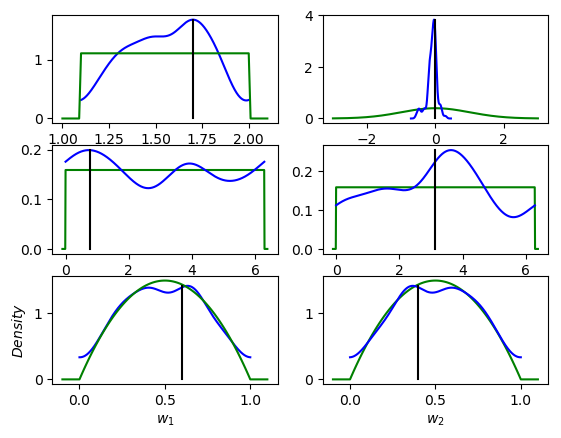

PyObject Text(0.5,24.4,'$w_2$')

In [10]:
#  DNN deepsets
h1 = kde(posterior_deepsets[:,1]; boundary=(1.1,2))
h2 = kde(posterior_deepsets[:,2])
h3 = kde(posterior_deepsets[:,3]; boundary=(0,2pi))
h4 = kde(posterior_deepsets[:,4]; boundary=(0,2pi))
h5 = kde(posterior_deepsets[:,5]; boundary=(0,1))
h6 = kde(posterior_deepsets[:,6]; boundary=(0,1))


PyPlot.figure()
PyPlot.subplot(321)
PyPlot.plot(h1.x,h1.density, "b")
PyPlot.plot(x_grid1,priordensity1, "g")
PyPlot.plot((θ_true[1], θ_true[1]), (0, maximum(h1.density)), "k")
PyPlot.xlabel(L"$α$")
PyPlot.subplot(322)
PyPlot.plot(x_grid2,priordensity2, "g")
PyPlot.plot(h2.x,h2.density, "b")
PyPlot.plot((θ_true[2], θ_true[2]), (0, maximum(h2.density)), "k")
PyPlot.xlabel(L"$μ_0$")
PyPlot.subplot(323)
PyPlot.plot(x_grid3,priordensity3, "g")
PyPlot.plot(h3.x,h3.density, "b")
PyPlot.plot((θ_true[3], θ_true[3]), (0, maximum(h3.density)), "k")
PyPlot.xlabel(L"$ϕ_1$")
PyPlot.subplot(324)
PyPlot.plot(x_grid3,priordensity3, "g")
PyPlot.plot(h4.x,h4.density, "b")
PyPlot.plot((θ_true[4], θ_true[4]), (0, maximum(h4.density)), "k")
PyPlot.xlabel(L"$ϕ_2$")
PyPlot.subplot(325)
PyPlot.plot(h5.x,h5.density, "b")
PyPlot.plot(x_grid4,priordensity4, "g")
PyPlot.plot((θ_true[5], θ_true[5]), (0, maximum(h5.density)), "k")
PyPlot.xlabel(L"$w_1$")
PyPlot.ylabel(L"Density")
PyPlot.subplot(326)
PyPlot.plot(x_grid4,priordensity4, "g")
PyPlot.plot(h6.x,h6.density, "b")
PyPlot.plot((θ_true[6], θ_true[6]), (0, maximum(h6.density)), "k")
PyPlot.xlabel(L"$w_2$")


## Posterior inference results 

In [45]:
(α_true, μ_0_true, ϕ_1_true, ϕ_2_true, w_1_true, w_2_true) = θ_true

println("True paramter values:")
println(α_true) 
println(μ_0_true) 
println(ϕ_1_true) 
println(ϕ_2_true) 
println(w_1_true)
println(w_2_true) 


True paramter values:
1.7
0.0
0.7853981633974483
3.141592653589793
0.6
0.4


Set up.

## ABC

Posterior mean loss and true paramter loss for ABC.

In [46]:
posterior = Matrix(CSV.read("data/multivar alpha stable/posteriors_multiple_data_sets_abcrs.csv"; allowmissing=:auto))

α_hat = mean(posterior[1:6:end,:],dims=1)
μ_0_hat = mean(posterior[2:6:end,:],dims=1)
ϕ_1_hat = mean(posterior[3:6:end,:],dims=1)
ϕ_2_hat = mean(posterior[4:6:end,:],dims=1)
w_1_hat = mean(posterior[4:5:end,:],dims=1)
w_2_hat = mean(posterior[4:6:end,:],dims=1)


# loss

println("mean of posterior mean:")
println(mean(α_hat))
println(mean(μ_0_hat))
println(mean(ϕ_1_hat))
println(mean(ϕ_2_hat))
println(mean(w_1_hat))
println(mean(w_2_hat))
println(" ")

println("posterior mean loss:")
println(sqrt(mean((α_hat.-α_true).^2)))
println(sqrt(mean((μ_0_hat.-μ_0_true).^2)))
println(sqrt(mean((ϕ_1_hat.-ϕ_1_true).^2)))
println(sqrt(mean((ϕ_2_hat.-ϕ_2_true).^2)))
println(sqrt(mean((w_1_hat.-w_1_true).^2)))
println(sqrt(mean((w_2_hat.-w_2_true).^2)))


mean of posterior mean:
1.7373445494061537
-0.026176676033468804
2.305396485214506
2.3285767502987382
1.2173597380180616
2.3285767502987382
 
posterior mean loss:
0.06080353080059014
0.051196763284923924
1.6622873980004746
0.9996975513572606
0.6802061562734294
2.0144003119981826


## MLP

Posterior mean loss and true paramter loss for small MLP.

In [8]:
posterior = Matrix(CSV.read("data/multivar alpha stable/posteriors_multiple_data_sets_abcrs.csv"; allowmissing=:auto))

α_hat = mean(posterior[1:6:end,:],dims=1)
μ_0_hat = mean(posterior[2:6:end,:],dims=1)
ϕ_1_hat = mean(posterior[3:6:end,:],dims=1)
ϕ_2_hat = mean(posterior[4:6:end,:],dims=1)
w_1_hat = mean(posterior[4:5:end,:],dims=1)
w_2_hat = mean(posterior[4:6:end,:],dims=1)


# loss

println("mean of posterior mean:")
println(mean(α_hat))
println(mean(μ_0_hat))
println(mean(ϕ_1_hat))
println(mean(ϕ_2_hat))
println(mean(w_1_hat))
println(mean(w_2_hat))
println(" ")

println("posterior mean loss:")
println(sqrt(mean((α_hat.-α_true).^2)))
println(sqrt(mean((μ_0_hat.-μ_0_true).^2)))
println(sqrt(mean((ϕ_1_hat.-ϕ_1_true).^2)))
println(sqrt(mean((ϕ_2_hat.-ϕ_2_true).^2)))
println(sqrt(mean((w_1_hat.-w_1_true).^2)))
println(sqrt(mean((w_2_hat.-w_2_true).^2)))

posterior mean loss:
0.05731409696176292
0.2290614533861348
1.9921853994843457
0.18553541163480278
posterior mean loss:
0.05723355497754967
0.1278315210345258
2.077586628277422
0.1316164654321208


## Timeseries

Posterior mean loss and true paramter loss for timeseries network.

In [12]:
posterior = Matrix(CSV.read("data/multivar alpha stable/posteriors_multiple_data_sets_abcrs.csv"; allowmissing=:auto))

α_hat = mean(posterior[1:6:end,:],dims=1)
μ_0_hat = mean(posterior[2:6:end,:],dims=1)
ϕ_1_hat = mean(posterior[3:6:end,:],dims=1)
ϕ_2_hat = mean(posterior[4:6:end,:],dims=1)
w_1_hat = mean(posterior[4:5:end,:],dims=1)
w_2_hat = mean(posterior[4:6:end,:],dims=1)


# loss

println("mean of posterior mean:")
println(mean(α_hat))
println(mean(μ_0_hat))
println(mean(ϕ_1_hat))
println(mean(ϕ_2_hat))
println(mean(w_1_hat))
println(mean(w_2_hat))
println(" ")

println("posterior mean loss:")
println(sqrt(mean((α_hat.-α_true).^2)))
println(sqrt(mean((μ_0_hat.-μ_0_true).^2)))
println(sqrt(mean((ϕ_1_hat.-ϕ_1_true).^2)))
println(sqrt(mean((ϕ_2_hat.-ϕ_2_true).^2)))
println(sqrt(mean((w_1_hat.-w_1_true).^2)))
println(sqrt(mean((w_2_hat.-w_2_true).^2)))

posterior mean loss:
0.0842572296178597
0.08976825878268024
0.13635636542121013
0.19498759506146301
posterior mean loss:
0.09523327670040506
0.11211119351394157
0.14321040960589293
0.1434474051397308


## Deepsets

Posterior mean loss and true paramter loss for Deepsets.

In [14]:
posterior = Matrix(CSV.read("data/multivar alpha stable/posteriors_multiple_data_sets_abcrs.csv"; allowmissing=:auto))

α_hat = mean(posterior[1:6:end,:],dims=1)
μ_0_hat = mean(posterior[2:6:end,:],dims=1)
ϕ_1_hat = mean(posterior[3:6:end,:],dims=1)
ϕ_2_hat = mean(posterior[4:6:end,:],dims=1)
w_1_hat = mean(posterior[4:5:end,:],dims=1)
w_2_hat = mean(posterior[4:6:end,:],dims=1)


# loss

println("mean of posterior mean:")
println(mean(α_hat))
println(mean(μ_0_hat))
println(mean(ϕ_1_hat))
println(mean(ϕ_2_hat))
println(mean(w_1_hat))
println(mean(w_2_hat))
println(" ")

println("posterior mean loss:")
println(sqrt(mean((α_hat.-α_true).^2)))
println(sqrt(mean((μ_0_hat.-μ_0_true).^2)))
println(sqrt(mean((ϕ_1_hat.-ϕ_1_true).^2)))
println(sqrt(mean((ϕ_2_hat.-ϕ_2_true).^2)))
println(sqrt(mean((w_1_hat.-w_1_true).^2)))
println(sqrt(mean((w_2_hat.-w_2_true).^2)))

posterior mean loss:
0.09823987177117059
0.08926650374768312
0.11246340395881614
0.2654441879675964
posterior mean loss:
0.10784937253220138
0.11477680065335855
0.10761094770535191
0.2106702128019752


#### Compare multivariate Cramer test statistics

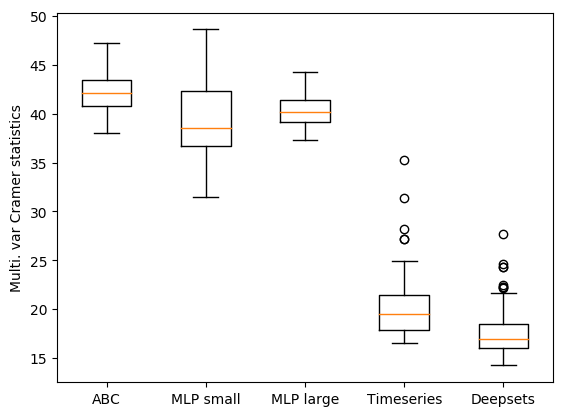

PyObject Text(24,0.5,'Multi. var Cramer statistics')

In [16]:
data = zeros(length(test_stats_abc),5)

data[:,1] = test_stats_abc
data[:,2] = test_stats_small_mlp
data[:,3] = test_stats_large_mlp
data[:,4] = test_stats_timeseries
data[:,5] = test_stats_deepsets

PyPlot.figure()
PyPlot.boxplot(data)
PyPlot.xticks([1, 2, 3, 4, 5], ["ABC", "MLP small", "MLP large", "Timeseries", "Deepsets"]);
PyPlot.ylabel("Multi. var Cramer statistics")

## Network performance with different traning data size

Load results for small MLP, large MLP, timeseries, and Deepsets.

In [22]:
posterior_2 = Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_simple_DNN_small_2.csv"; allowmissing=:auto))
posterior_3 = Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_simple_DNN_small_3.csv"; allowmissing=:auto))
posterior_4 = Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_simple_DNN_small_4.csv"; allowmissing=:auto))

test_stats_DNN_small_2 = zeros(size(posterior,2))
test_stats_DNN_small_3 = zeros(size(posterior,2))
test_stats_DNN_small_4 = zeros(size(posterior,2))


idx = 0
for i in 1:4:size(posterior,1)
    global idx = idx + 1
    global test_stats_DNN_small_2[idx] = multvar_cramer_stat(posterior_2[i:i+3,:],posterior_exact[i:i+3,1:500])
    global test_stats_DNN_small_3[idx] = multvar_cramer_stat(posterior_3[i:i+3,:],posterior_exact[i:i+3,1:500])
    global test_stats_DNN_small_4[idx] = multvar_cramer_stat(posterior_4[i:i+3,:],posterior_exact[i:i+3,1:500])
end

posterior_2 = Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_simple_DNN_large_2.csv"; allowmissing=:auto))
posterior_3 = Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_simple_DNN_large_3.csv"; allowmissing=:auto))
posterior_4 = Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_simple_DNN_large_4.csv"; allowmissing=:auto))

test_stats_DNN_large_2 = zeros(size(posterior,2))
test_stats_DNN_large_3 = zeros(size(posterior,2))
test_stats_DNN_large_4 = zeros(size(posterior,2))

idx = 0
for i in 1:4:size(posterior,1)
    global idx = idx + 1
    global test_stats_DNN_large_2[idx] = multvar_cramer_stat(posterior_2[i:i+3,:],posterior_exact[i:i+3,1:500])
    global test_stats_DNN_large_3[idx] = multvar_cramer_stat(posterior_3[i:i+3,:],posterior_exact[i:i+3,1:500])
    global test_stats_DNN_large_4[idx] = multvar_cramer_stat(posterior_4[i:i+3,:],posterior_exact[i:i+3,1:500])
end

posterior_2 = Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_dnn_timseries_data_2.csv"; allowmissing=:auto))
posterior_3 = Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_dnn_timseries_data_3.csv"; allowmissing=:auto))
posterior_4 = Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_dnn_timseries_data_4.csv"; allowmissing=:auto))

test_stats_timeseries_2 = zeros(size(posterior,2))
test_stats_timeseries_3 = zeros(size(posterior,2))
test_stats_timeseries_4 = zeros(size(posterior,2))

idx = 0
for i in 1:4:size(posterior,1)
    global idx = idx + 1
    global test_stats_timeseries_2[idx] = multvar_cramer_stat(posterior_2[i:i+3,:],posterior_exact[i:i+3,1:500])
    global test_stats_timeseries_3[idx] = multvar_cramer_stat(posterior_3[i:i+3,:],posterior_exact[i:i+3,1:500])
    global test_stats_timeseries_4[idx] = multvar_cramer_stat(posterior_4[i:i+3,:],posterior_exact[i:i+3,1:500])
end


posterior_2 = Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_deepsets_2.csv"; allowmissing=:auto))
posterior_3 = Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_deepsets_3.csv"; allowmissing=:auto))
posterior_4 = Matrix(CSV.read("data/gandk/posteriors_multiple_data_sets_deepsets_4.csv"; allowmissing=:auto))

test_stats_deepsets_2 = zeros(size(posterior,2))
test_stats_deepsets_3 = zeros(size(posterior,2))
test_stats_deepsets_4 = zeros(size(posterior,2))

idx = 0
for i in 1:4:size(posterior,1)
    global idx = idx + 1
    global test_stats_deepsets_2[idx] = multvar_cramer_stat(posterior_2[i:i+3,:],posterior_exact[i:i+3,1:500])
    global test_stats_deepsets_3[idx] = multvar_cramer_stat(posterior_3[i:i+3,:],posterior_exact[i:i+3,1:500])
    global test_stats_deepsets_4[idx] = multvar_cramer_stat(posterior_4[i:i+3,:],posterior_exact[i:i+3,1:500])
end


Store test statistics in matrices. 

In [32]:
data2 = zeros(length(test_stats_abc),4)

data2[:,1] = test_stats_DNN_small_2
data2[:,2] = test_stats_DNN_large_2
data2[:,3] = test_stats_timeseries_2
data2[:,4] = test_stats_deepsets_2

data3 = zeros(length(test_stats_abc),4)

data3[:,1] = test_stats_DNN_small_3
data3[:,2] = test_stats_DNN_large_3
data3[:,3] = test_stats_timeseries_3
data3[:,4] = test_stats_deepsets_3

data4 = zeros(length(test_stats_abc),4)

data4[:,1] = test_stats_DNN_small_4
data4[:,2] = test_stats_DNN_large_4
data4[:,3] = test_stats_timeseries_4
data4[:,4] = test_stats_deepsets_4

data_mean_stats = [mean(data[:,2:end],dims=1); mean(data2,dims=1); mean(data3,dims=1); mean(data4,dims=1)];

Compare results training on 5*10^5 observations. 

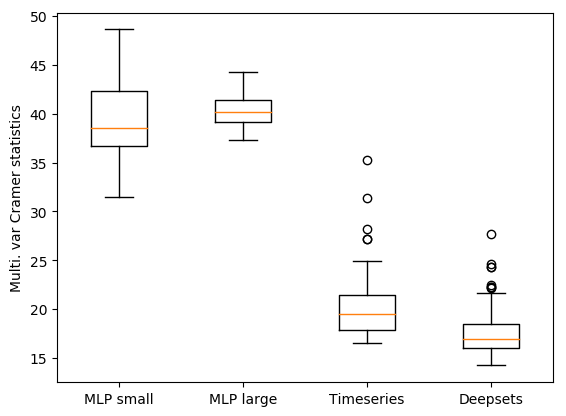

PyObject Text(24,0.5,'Multi. var Cramer statistics')

In [33]:
PyPlot.figure()
PyPlot.boxplot(data[:,2:end])
PyPlot.xticks([1, 2, 3, 4], ["MLP small", "MLP large", "Timeseries", "Deepsets"]);
PyPlot.ylabel("Multi. var Cramer statistics")

Compare results training on 10^5 observations. 

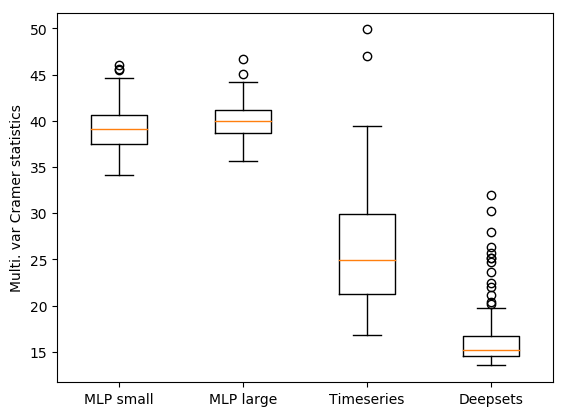

PyObject Text(24,0.5,'Multi. var Cramer statistics')

In [34]:
PyPlot.figure()
PyPlot.boxplot(data2)
PyPlot.xticks([1, 2, 3, 4], ["MLP small", "MLP large", "Timeseries", "Deepsets"]);
PyPlot.ylabel("Multi. var Cramer statistics")

Compare results training on 10^4 observations. 

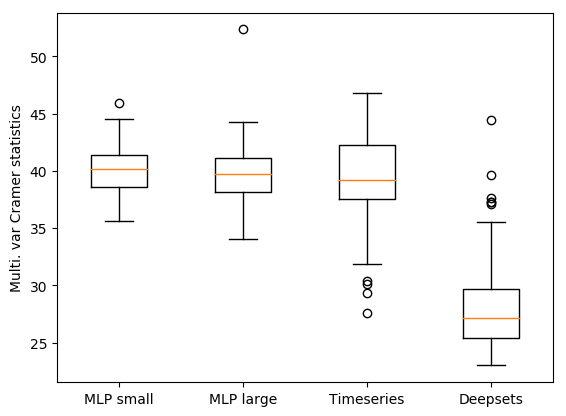

PyObject Text(24,0.5,'Multi. var Cramer statistics')

In [35]:
PyPlot.figure()
PyPlot.boxplot(data3)
PyPlot.xticks([1, 2, 3, 4], ["MLP small", "MLP large", "Timeseries", "Deepsets"]);
PyPlot.ylabel("Multi. var Cramer statistics")

Compare results training on 10^3 observations. 

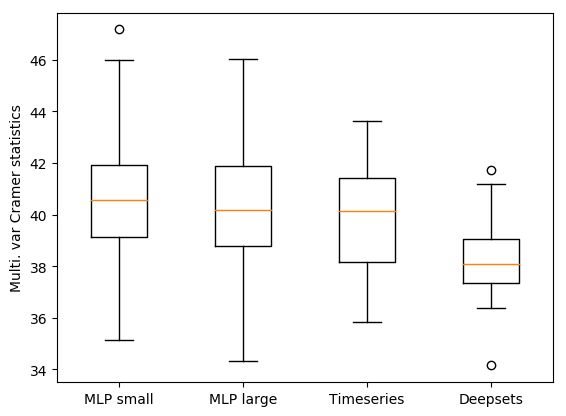

PyObject Text(24,0.5,'Multi. var Cramer statistics')

In [36]:
PyPlot.figure()
PyPlot.boxplot(data4)
PyPlot.xticks([1, 2, 3, 4], ["MLP small", "MLP large", "Timeseries", "Deepsets"]);
PyPlot.ylabel("Multi. var Cramer statistics")

Plot multi. var Cramer statistics as function of the training data size. Blue line samll MLP, red line large MLP, green line timeseries, black line Deepsets.

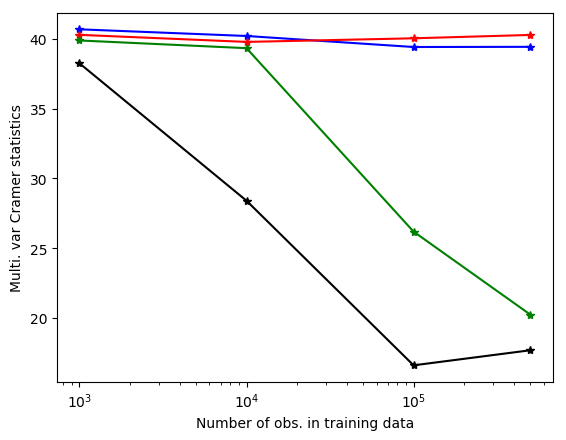

PyObject Text(24,0.5,'Multi. var Cramer statistics')

In [37]:
# plotting
x_scale = [5*10^5, 10^5, 10^4, 10^3]

PyPlot.figure()
PyPlot.semilogx(x_scale, data_mean_stats[:,1], "*-b")
PyPlot.semilogx(x_scale, data_mean_stats[:,2], "*-r")
PyPlot.semilogx(x_scale, data_mean_stats[:,3], "*-g")
PyPlot.semilogx(x_scale, data_mean_stats[:,4], "*-k")
PyPlot.xlabel("Number of obs. in training data")
PyPlot.ylabel("Multi. var Cramer statistics")